In [24]:
import torch
import matplotlib.pyplot as plt

from trainer import Trainer
from trajectory_generator import TrajectoryGenerator
from utils.make_train_target import make_train_target

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set simulation and model parameters

In [2]:
T = 20  # duration of simulated trajectories (seconds)
srate = 50  # sampling rate (Hz)

border_region = 0.03  # max. distance to wall (m)
sequence_length = T * srate  # number of steps in trajectory
box_width = 2.2       # width of training environment (m)
box_height = 2.2      # height of training environment (m)
mini_batch_size = 64

### Generate training data and train model

In [3]:
# n_data = mini_batch_size * 2
n_data_train = 1000
model_name = 'RNN-100'
trajectory_generator = TrajectoryGenerator(sequence_length, border_region, box_width, box_height, n_data_train)
position, velocity, head_dir = trajectory_generator.generate_trajectory()
train = make_train_data(velocity, head_dir)

In [4]:
# start training
trainer = Trainer(train, position, model_name, rnn_layer='custom', n_epochs=10)
train_loss_epochs = trainer.train()

RNNModel(
  (rnn): RNNLayer()
  (linear): Linear(in_features=100, out_features=2, bias=False)
)
Epoch 1
-------------------------------
loss: 0.4586639448941154
loss: 0.45871041302691057
Training loss: 0.458687178960513  150.079 seconds for this epoch 

Epoch 2
-------------------------------
loss: 0.45866107852537763
loss: 0.4594041282211194
Training loss: 0.4590326033732485  151.97 seconds for this epoch 

Epoch 3
-------------------------------
loss: 0.4586592798485315
loss: 0.45929271020582596
Training loss: 0.45897599502717873  155.312 seconds for this epoch 



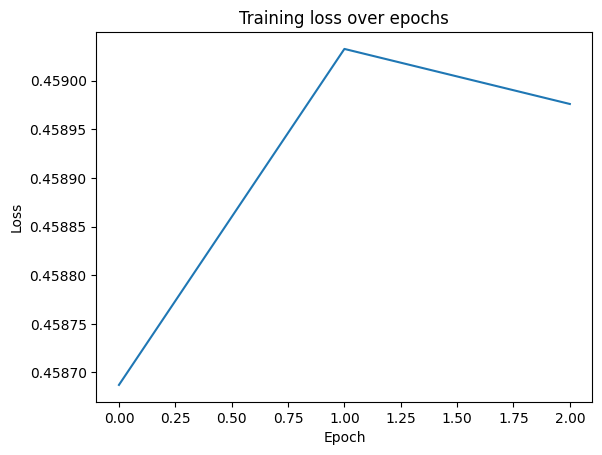

In [26]:
plt.plot(train_loss_epochs)
plt.title('Training loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss.png', bbox_inches='tight')

plt.show()

### Generate test data and evaluate model

In [15]:
n_data_test = 100
trajectory_generator = TrajectoryGenerator(sequence_length, border_region, box_width, box_height, n_data_test)
position, velocity, head_dir = trajectory_generator.generate_trajectory()
test, target = make_train_data(position, velocity, head_dir)

In [16]:
rnn_model = torch.load('models/RNN-100-model.pt')

In [22]:
aggregate_loss, y_pred = rnn_model.evaluate(test, target)

Start evaluation run: 
.

Aggregated loss: 0.4594797880378215  0.971 seconds for this run 



In [ ]:
traj_idx = 2
plt.scatter(position[traj_idx, 0, 0], position[traj_idx, 0, 1], color = 'red', label = 'simulated starting point')
plt.plot(position[traj_idx, :, 0], position[traj_idx, :, 1], label = 'simulated trajectory')

plt.scatter(y_pred[traj_idx, 0, 0], y_pred[traj_idx, 0, 1], color = 'green', label = 'decoded starting point')
plt.plot(y_pred[traj_idx, :, 0], y_pred[traj_idx, :, 1], label = 'decoded trajectory')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.legend(bbox_to_anchor=(1.5, 1.))

plt.savefig('trajectory.png', bbox_inches='tight')
plt.show()